## Created by Mukesh Kumar
### This code is part of the LangGraph tutorials, specifically for a BMI calculator workflow.

In [27]:
from langgraph.graph import StateGraph, START, END
from typing import Any, Dict, List, TypedDict

In [28]:
# Define the state graph for the BMI calculator workflow
class BMICalculatorState(TypedDict):
    weight: float
    height: float
    bmi: float
    category: str
    

In [29]:
def CalculateBMI(state: BMICalculatorState) -> BMICalculatorState:
    """Calculate BMI based on weight and height."""
    if state['height'] <= 0:
        raise ValueError("Height must be greater than zero.")
    if state['weight'] <= 0:
        raise ValueError("Weight must be greater than zero.")
    
    state['bmi'] = state['weight'] / (state['height'] ** 2)
    state['bmi'] = round(state['bmi'], 2)  # Round to 2 decimal places
    return state

In [30]:
def LabelBMI(state: BMICalculatorState) -> BMICalculatorState:
    """Label the BMI category based on the calculated BMI."""
    if state['bmi'] < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= state['bmi'] < 24.9:
        state['category'] = 'Normal weight'
    elif 25 <= state['bmi'] < 29.9:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obesity'
    return state

In [31]:
# Define the workflow for calculating BMI
BMICalculatorGraph = StateGraph(BMICalculatorState)

# Add nodes
BMICalculatorGraph.add_node("Calculate_BMI",CalculateBMI, state=BMICalculatorState)
BMICalculatorGraph.add_node("Label_BMI", LabelBMI, state=BMICalculatorState)

# Add edges
BMICalculatorGraph.add_edge(START, "Calculate_BMI")
BMICalculatorGraph.add_edge("Calculate_BMI", "Label_BMI")
BMICalculatorGraph.add_edge("Label_BMI", END)

# Compile the graph
workflow = BMICalculatorGraph.compile()


In [32]:
# Execute the workflow
intial_state: BMICalculatorState = {
    'weight': 70.0,  # Example weight in kg
    'height': 1.75,  # Example height in meters
    'bmi': 0.0       # Initial BMI value
}

result_state = workflow.invoke(intial_state)
print(f"Calculated BMI: {result_state['bmi']}")
print(f"BMI Category: {result_state['category']}")
# --- IGNORE ---

Calculated BMI: 22.86
BMI Category: Normal weight


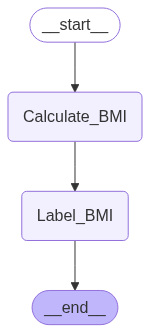

In [33]:
from IPython.display import display, Markdown, Image
Image(workflow.get_graph().draw_mermaid_png())
# display(Markdown("### BMI Calculator Workflow"))